https://stackoverflow.com/questions/77587951/how-to-fit-a-system-of-odes-with-interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

In [2]:
def system(t, x, k0, k1, k2, p1, p2):
    return np.array([
        -k0 * x[0],
        p1 * x[0] - k1 * x[1],
        p2 * x[1] - k2 * x[2]
    ])

In [3]:
def solver(parameters, t=np.linspace(0, 1, 10), x0=np.ones(3)):
    solution = integrate.solve_ivp(system, [t.min(), t.max()], x0, args=parameters, t_eval=t)
    return solution.y

In [4]:
texp = np.linspace(0, 35, 15)
#p0 = np.array([ 0.03693555,  0.38054633, -0.06252069,  1.41453107, -0.11159681])
p0 = np.array([ 1, 1, 1, 1, 1])

x0 = np.array([1., 1., 1.])

In [5]:
xexp = solver(p0, t=texp, x0=x0)

In [6]:
def residuals_factory(t, x):
    def wrapped(parameters):
        return 0.5 * np.sum(np.power(x - solver(parameters, t=t, x0=x[:, 0]), 2))
    return wrapped

In [7]:
residuals = residuals_factory(texp, xexp)
solution = optimize.minimize(
    residuals, x0=[1, 1, 1, 1, 1],
    bounds=[(0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
)

In [8]:
solution

      fun: 0.0
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.16935649e-10, 2.51138896e-09, 2.63350102e-09, 5.82291302e-10,
       1.13747477e-09])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1., 1., 1., 1., 1.])

In [9]:
p0

array([1, 1, 1, 1, 1])

In [10]:
tlin = np.linspace(texp.min(), texp.max(), 200)
xhat = solver(solution.x, t=tlin, x0=xexp[:, 0])

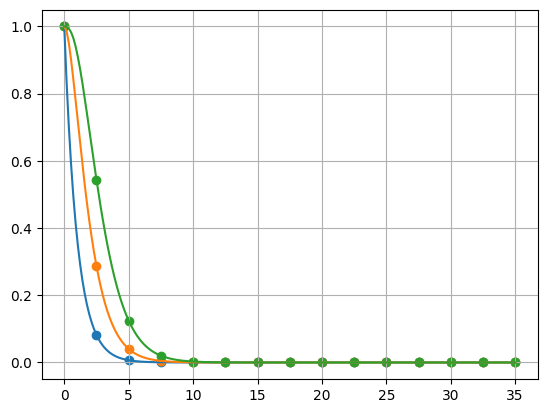

In [11]:
fig, axe = plt.subplots()
for i in range(xexp.shape[0]):
    axe.scatter(texp, xexp[i, :])
    axe.plot(tlin, xhat[i, :])
axe.grid()